In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [119]:
def display_images(images):
    plt.figure(figsize=(20, 10))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis(False)


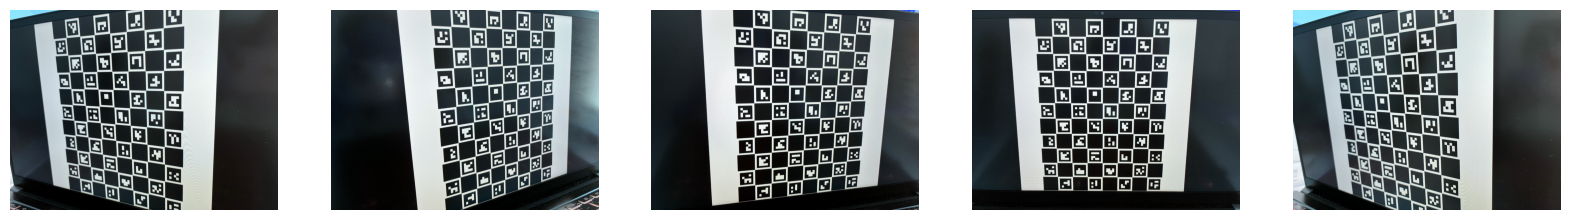

In [41]:
# load images
raw_images = [cv2.imread('../images/imgs_phone/img{}.png'.format(i)) for i in range(1, 6)]
display_images(raw_images)

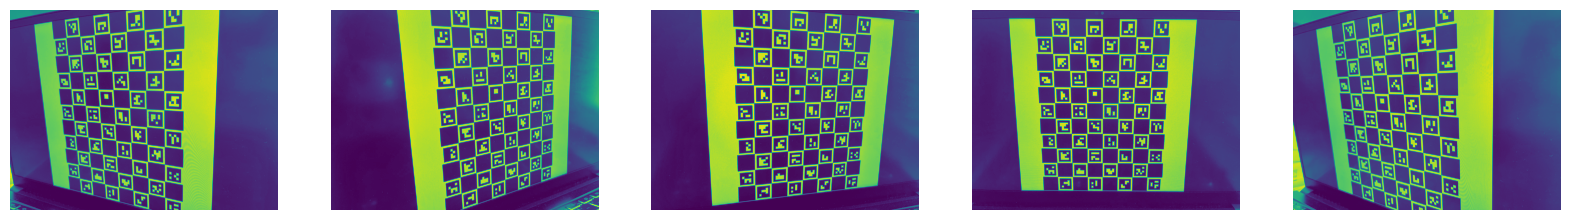

In [42]:
# convert to grayscale
images = [raw_image[:, :, 0] for raw_image in raw_images]
display_images(images)

In [123]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
(squaresX, squaresY) = (7, 10)
objp = np.zeros((squaresX * squaresY, 3), np.float32)
objp[:, :2] = np.mgrid[0:squaresX, 0:squaresY].T.reshape(-1,2)
objp.shape

(70, 3)

In [55]:
(squareLength, markerLength) = (48/11, 18.75*48/11/24)
print(f'squareLength = {squareLength} mm')
print(f'markerLength = {markerLength} mm')

squareLength = 4.363636363636363 mm
markerLength = 3.4090909090909087 mm


In [57]:
# create charuco board
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)
board = cv2.aruco.CharucoBoard((squaresX, squaresY), squareLength, markerLength, aruco_dict)
board

< cv2.aruco.CharucoBoard 0x13f88a5d0>

In [82]:
# detector_params = cv2.aruco.DetectorParameters()
detector = cv2.aruco.CharucoDetector(board)
detector

< cv2.aruco.CharucoDetector 0x13f88a910>

68 68
Detected 68/68
64 64
Detected 64/64
70 70
Detected 70/70
70 70
Detected 70/70
53 53
Detected 53/53


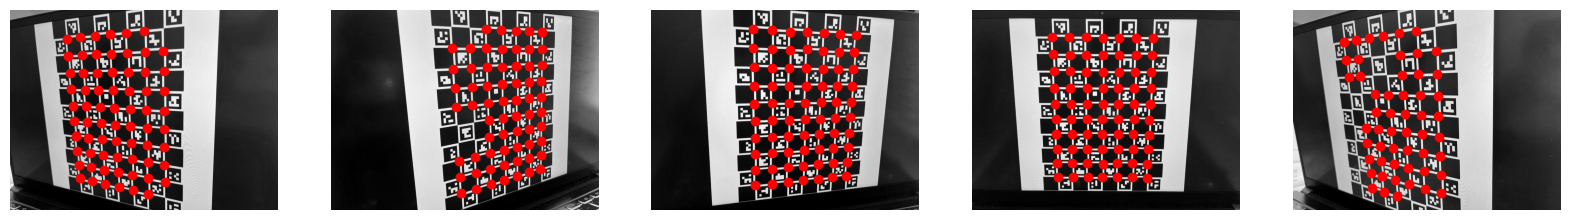

In [124]:
# arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

plt.figure(figsize=(20, 10))
# loop over all image paths
for i in range(len(images)):
    gray = images[i]

    # find aruco markers
    charuco_corners, charuco_ids, _, _ = detector.detectBoard(gray)
    # charucoCorners, charucoIds, markerCorners, markerIds
    if len(charuco_corners) == 0:
        continue
    print(len(charuco_corners), len(charuco_ids))

    # display
    plt.subplot(1, len(images), i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.scatter(charuco_corners[:, 0, 0], charuco_corners[:, 0, 1], color='r')
    plt.axis(False)
    
    if charuco_corners is not None:
        print(f"Detected {len(charuco_corners)}/{len(charuco_ids)}")

    if charuco_corners is not None and charuco_ids is not None and len(charuco_corners) > 6 and len(charuco_ids) > 6:
        # store object points and image points
        objp_ = objp[charuco_ids]
        # print(objp_.shape, charuco_corners.shape)
        objpoints.append(objp_)
        imgpoints.append(charuco_corners)


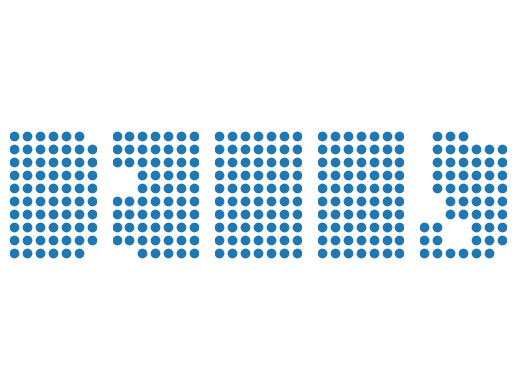

In [126]:
for i in range(len(images)):
    pts = objpoints[i]
    plt.subplot(1, len(images), i + 1)
    plt.scatter(pts[:, 0, 0], pts[:, 0, 1])
    plt.axis('equal')
    plt.axis(False)